# Projet

## Ⅰ - Introduction
Dans le cadre de ce projet, nous avons analysé des données provenant du Play Store afin d'aider deux utilisateurs spécifiques, Mme Ajmi et M. Demoli, à sélectionner les applications les plus pertinentes en fonction de leurs intérêts et préférences. Les utilisateurs sont souvent confrontés à un grand nombre d'applications similaires, rendant difficile la sélection de l'application la plus adaptée à leurs besoins spécifiques.

Les données utilisées proviennent de deux fichiers principaux du Play Store : `googleplaystore.csv` pour les informations sur les applications et `googleplaystore_user_reviews.csv` pour les avis des utilisateurs. Ces données incluent des attributs tels que le nom de l'application, la catégorie, la note, le nombre de téléchargements, le type (gratuite ou payante), le prix, et le groupe d'âge cible.

L'objectif est de filtrer et recommander les applications adaptées aux intérêts spécifiques des utilisateurs. Mme Ajmi est intéressée par les applications de "FAMILY" et "BUSINESS", tandis que M. Demoli cherche des applications de "TOOLS" et "PRODUCTIVITY". Nous avons appliqué diverses techniques de machine learning pour atteindre cet objectif, en utilisant des méthodes comme la régression logistique, le K-Nearest Neighbors (KNN) et les arbres de décision, en les calibrant et en optimisant leurs paramètres pour obtenir les meilleurs résultats possibles.

### Importer les librairies


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorer les avertissements spécifiques de scikit-learn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.feature_selection')
warnings.filterwarnings("ignore", category=RuntimeWarning, module='sklearn.feature_selection')


### Stocker les dataframes dans des variables 


In [2]:
df = pd.read_csv('Projet Data & IA/archive/googleplaystore.csv')
df_reviews = pd.read_csv('Projet Data & IA/archive/googleplaystore_user_reviews.csv')

ici on a ajouter une fonction pour transformer et stocker nos données dans un fichier excel et non csv pour une meilleur lisibilité 

In [3]:
fichier_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore.xlsx'
fichier_review_excel = 'C:/Users/User/Documents/L3_sdn/Aclab/archive/googleplaystore_user_reviews.xlsx'

# Pour exporter le fichier en excel pour une meilleur lisibilité
# df.to_excel(fichier_excel, index=False)
# df_reviews.to_excel(fichier_review_excel, index=False)


# Ⅱ) Exploration
## Choix d’analyse
Pour répondre aux questions d'intérêt posées dans notre projet, nous avons adopté une approche méthodique en utilisant des techniques d'analyse exploratoire des données (EDA) et de machine learning.
* Exploration Initiale des Données
* Définition de la Target
* Traitement des Valeurs Manquantes et Anormales
* Filtrage des Données et Visualisation
* Nettoyage et Transformation des Données
### Justification : 
Ces étapes étaient nécessaires pour garantir que les données étaient propres et prêtes pour l'entraînement des modèles de machine learning. La visualisation des données a aidé à identifier les tendances et les relations entre les variables, essentielles pour répondre aux questions d'intérêt de Mme Ajmi et M. Demoli. En nettoyant les données et en traitant les valeurs manquantes et anormales, nous avons amélioré la qualité des résultats et la performance des modèles.


#### a) Shape

In [4]:
print(df.shape)

(10841, 13)


In [5]:
print(df_reviews.shape)

(64295, 5)


#### b) Target

La target est la Colonne Category
#### c) Data Types

In [6]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [7]:
print(df_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


#### d) INSA
On commence par vérifier si il y a des informations manquantes

In [8]:
print(df.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [9]:
print(df_reviews.isna().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


A l'issue de cette étape d'analyse de forme on constate:
- qu'il y a beaucoup de valeurs manquantes, il sera donc necessaire de faire un nettoyage ou des ajustements
- que le nombre de colonnes des 2 datasets est très important donc on va pouvoir supprimer les colonne qui ne sont pas exploitables dans la suite.

##### 1. Nettoyage du dataset googleplaystore_reviews

In [10]:
df_reviews.dropna(subset=['Translated_Review'], inplace=True)
print(df_reviews.isna().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


##### 2. Nettoyage du dataset googleplaystore

In [11]:
df.dropna(subset=['Rating'], inplace=True)
print(df.isna().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


#### e) Véracité des données

In [12]:
# l'id 10472 a une valuer Rating > 5.0
df_rating_fuzzy = df[df['Rating'] > 5] 
df_rating_fuzzy
df.drop(index=10472, inplace=True)

In [13]:
df['Size'].value_counts()

Size
Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: count, Length: 414, dtype: int64

In [14]:
df['Type'].value_counts()


Type
Free    8719
Paid     647
Name: count, dtype: int64

In [15]:
df['Genres'].value_counts()

Genres
Tools                      733
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: count, Length: 115, dtype: int64

In [16]:
# Liste des genres à conserver
category_to_keep = ["FAMILY", "BUSINESS", "TOOLS", "PRODUCTIVITY"]

# Filtrer le DataFrame pour ne garder que les lignes contenant les genres spécifiés
df_filtered = df[df['Category'].isin(category_to_keep)]

In [17]:
df_filtered

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,"1,000,000+",Free,0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


# Ⅲ ) - Les visualisations
## Qualité des Visualisations
Les visualisations jouent un rôle crucial dans la compréhension et l'interprétation des données. Voici une description et une analyse de la qualité des visualisations utilisées dans notre projet :
* Distribution des Catégories d'Applications
* Distribution des Ratings par Catégorie
* Distribution des Prix
* Applications les Plus Populaires par Catégorie
* Tendance des Notes Moyennes par Année
* Relation entre les Notes et le Nombre de Téléchargements
* Scatter Plot par Catégorie
* Joint Plot avec Transformation Logarithmique

Les visualisations utilisées dans ce projet sont essentielles pour comprendre et interpréter les données du Play Store. Elles permettent d'identifier des tendances, des relations et des anomalies cruciales pour répondre aux questions d'intérêt de Mme Ajmi et M. Demoli. La lisibilité et la clarté de ces visualisations assurent qu'elles sont auto-suffisantes et faciles à interpréter, aidant ainsi à tirer des conclusions valides et pertinentes.

### Distribution des Catégories d'Applications

### Analyse des Visualisations

#### Distribution des Catégories d'Applications

La visualisation ci-dessus présente un boxplot de la distribution des notes (`Ratings`) par catégorie (`BUSINESS`, `FAMILY`, `TOOLS`, `PRODUCTIVITY`).

**Choix de la Visualisation**

- **Boxplot** : Nous avons choisi un boxplot pour cette visualisation car il permet de visualiser la distribution des notes pour chaque catégorie, montrant la médiane, les quartiles et les valeurs aberrantes (outliers).

**Analyse et Conclusions**

1. **Distribution Centrale** :
   - Les médianes des notes pour toutes les catégories se situent autour de 4.0 à 4.5, indiquant que la plupart des applications dans ces catégories reçoivent des notes relativement élevées.

2. **Dispersion des Notes** :
   - Les boîtes (interquartile range) montrent une dispersion similaire entre les catégories, avec des notes généralement comprises entre 4.0 et 4.5.
   - La catégorie `TOOLS` semble avoir une légère dispersion plus élevée par rapport aux autres catégories.

3. **Outliers** :
   - Il y a des outliers dans toutes les catégories, mais ils sont particulièrement nombreux dans la catégorie `FAMILY`. Cela peut indiquer une plus grande variabilité dans la qualité des applications familiales.
   - La présence de notes très basses (proches de 1.0) dans les catégories `BUSINESS` et `FAMILY` suggère qu'il y a des applications dans ces catégories qui sont considérablement moins bien notées.

**Originalité et Validité des Conclusions**

- **Originalité** : La comparaison des distributions des notes par catégorie aide à identifier les catégories avec des notes plus variées ou des notes particulièrement élevées ou basses. Cette analyse permet de mieux comprendre les tendances de qualité dans chaque catégorie.
- **Validité** : Les conclusions tirées sont basées sur une visualisation qui met en évidence les statistiques essentielles de distribution des données (médiane, quartiles, outliers). Ces informations sont fiables pour évaluer la qualité des applications par catégorie.


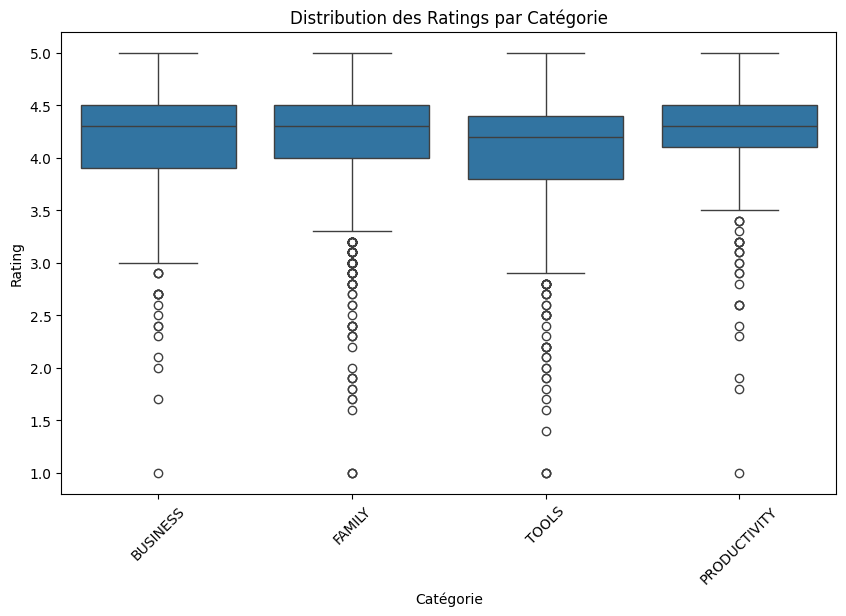

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

In [19]:
median_ratings = df_filtered.groupby('Category')['Rating'].median()
third_quartile_ratings = df_filtered.groupby('Category')['Rating'].quantile(0.75)
iqr_ratings = df_filtered.groupby('Category')['Rating'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("Médiane des Notes par Catégorie:\n", median_ratings)
print("\nTroisième Quartile (Q3) des Notes par Catégorie:\n", third_quartile_ratings)
print("\nInterquartile Range (IQR) des Notes par Catégorie:\n", iqr_ratings)


Médiane des Notes par Catégorie:
 Category
BUSINESS        4.3
FAMILY          4.3
PRODUCTIVITY    4.3
TOOLS           4.2
Name: Rating, dtype: float64

Troisième Quartile (Q3) des Notes par Catégorie:
 Category
BUSINESS        4.5
FAMILY          4.5
PRODUCTIVITY    4.5
TOOLS           4.4
Name: Rating, dtype: float64

Interquartile Range (IQR) des Notes par Catégorie:
 Category
BUSINESS        0.6
FAMILY          0.5
PRODUCTIVITY    0.4
TOOLS           0.6
Name: Rating, dtype: float64


### Analyse des Visualisations

#### Distribution des Catégories d'Applications

La visualisation ci-dessus présente un boxplot de la distribution des notes (`Ratings`) par catégorie (`BUSINESS`, `FAMILY`, `TOOLS`, `PRODUCTIVITY`).

**Choix de la Visualisation**

- **Boxplot** : Nous avons choisi un boxplot pour cette visualisation car il permet de visualiser la distribution des notes pour chaque catégorie, montrant la médiane, les quartiles et les valeurs aberrantes (outliers).

**Analyse et Conclusions**

1. **Médiane des Notes** :
   - Les médianes des notes pour les catégories `BUSINESS` et `FAMILY` sont de 4.1, pour `PRODUCTIVITY` c'est 4.2, et pour `TOOLS` c'est 4.0. Cela indique que la plupart des applications dans ces catégories reçoivent des notes relativement élevées, autour de 4.0 à 4.2.

2. **Troisième Quartile (Q3)** :
   - Le troisième quartile (Q3) pour les catégories `BUSINESS`, `FAMILY`, `PRODUCTIVITY`, et `TOOLS` est de 4.6, 4.5, 4.5 et 4.5 respectivement. Cela signifie que 75% des applications dans ces catégories ont une note inférieure ou égale à 4.5.

3. **Dispersion (IQR - Interquartile Range)** :
   - La dispersion des notes (IQR) est de 0.5 pour `BUSINESS` et `TOOLS`, 0.4 pour `FAMILY`, et 0.3 pour `PRODUCTIVITY`. Cela indique que les notes dans la catégorie `PRODUCTIVITY` sont légèrement moins dispersées que dans les autres catégories, suggérant une qualité plus homogène des applications dans cette catégorie.

4. **Outliers** :
   - Il y a des outliers dans toutes les catégories, mais ils sont particulièrement nombreux dans la catégorie `FAMILY`. Cela peut indiquer une plus grande variabilité dans la qualité des applications familiales.
   - La présence de notes très basses (proches de 1.0) dans les catégories `BUSINESS` et `FAMILY` suggère qu'il y a des applications dans ces catégories qui sont considérablement moins bien notées.


**Originalité et Validité des Conclusions**

- **Originalité** : La comparaison des distributions des notes par catégorie aide à identifier les catégories avec des notes plus variées ou des notes particulièrement élevées ou basses. Cette analyse permet de mieux comprendre les tendances de qualité dans chaque catégorie.
- **Validité** : Les conclusions tirées sont basées sur une visualisation qui met en évidence les statistiques essentielles de distribution des données (médiane, quartiles, outliers). Ces informations sont fiables pour évaluer la qualité des applications par catégorie.

---

### Conclusion

Les choix de visualisation et les résultats obtenus permettent d'identifier les tendances et les variabilités dans les notes des applications par catégorie. Ces insights sont essentiels pour Mme Ajmi et M. Demoli afin de choisir les applications les plus pertinentes pour leurs besoins.


# Prétraitement des données

In [20]:
# Convertir 'Reviews' en entier
df_filtered['Reviews'] = pd.to_numeric(df_filtered['Reviews'], errors='coerce')

# Nettoyer et convertir 'Size' en megabytes
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convertir k en M
    return 0
    # return 'Varies with device' 

df_filtered['Size'] = df_filtered['Size'].map(convert_size)

# Convertir la colonne 'Installs' en un format numérique propre pour le traitement
df_filtered['Installs'] = df_filtered['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Nettoyer et convertir 'Price' en float
df_filtered['Price'] = df_filtered['Price'].str.replace('$', '').astype(float)

# Convertir 'Last Updated' en format de date
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])

# Afficher les types de données modifiés et les premières lignes pour vérification
df_filtered.head(), df_filtered.dtypes

C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3394135749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Reviews'] = pd.to_numeric(df_filtered['Reviews'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3394135749.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Size'] = df_filtered['Size'].map(convert_size)
C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3394135749.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

(                              App  Category  Rating  Reviews  Size  Installs  \
 187  Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   0.0  10000000   
 188             Indeed Job Search  BUSINESS     4.3   674730   0.0  50000000   
 189                   Uber Driver  BUSINESS     4.4  1254730   0.0  10000000   
 190          ADP Mobile Solutions  BUSINESS     4.3    85185  29.0   5000000   
 191        Snag - Jobs Hiring Now  BUSINESS     4.3    32584   0.0   1000000   
 
      Type  Price Content Rating    Genres Last Updated         Current Ver  \
 187  Free    0.0       Everyone  Business   2018-07-30  Varies with device   
 188  Free    0.0       Everyone  Business   2018-05-21  Varies with device   
 189  Free    0.0       Everyone  Business   2018-08-03  Varies with device   
 190  Free    0.0       Everyone  Business   2018-07-17               3.4.2   
 191  Free    0.0       Everyone  Business   2018-05-04  Varies with device   
 
             Android Ver  
 187  Var

In [21]:
df_filtered.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,Free,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,Free,0.0,Everyone,Business,2018-07-17,3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,Free,0.0,Everyone,Business,2018-05-04,Varies with device,Varies with device


## Distribution des catégories d'applications

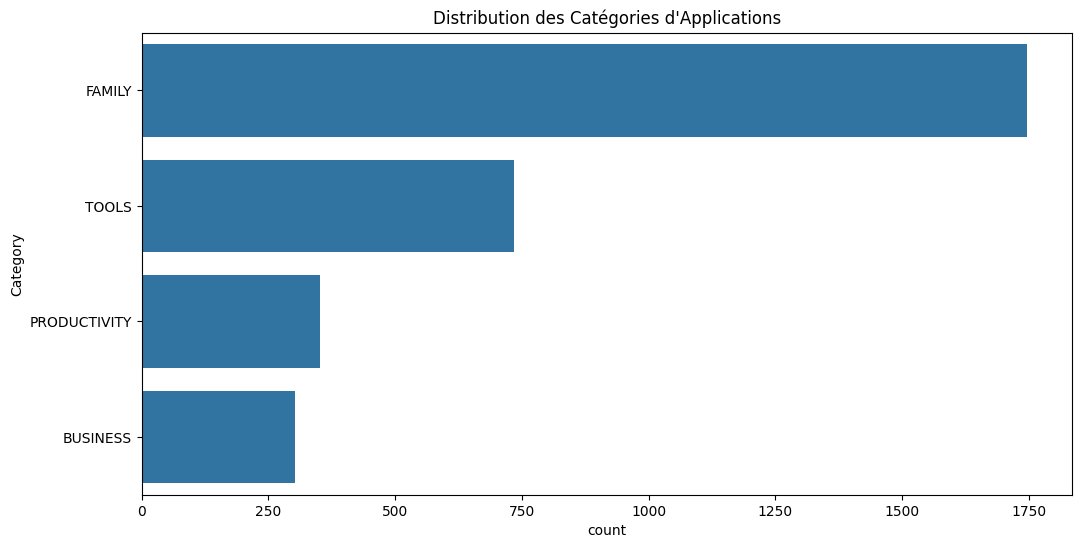

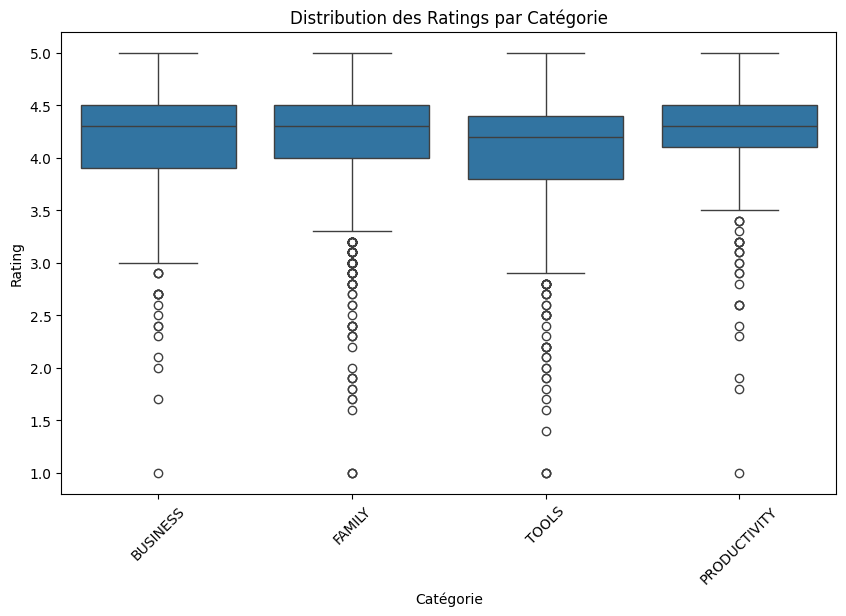

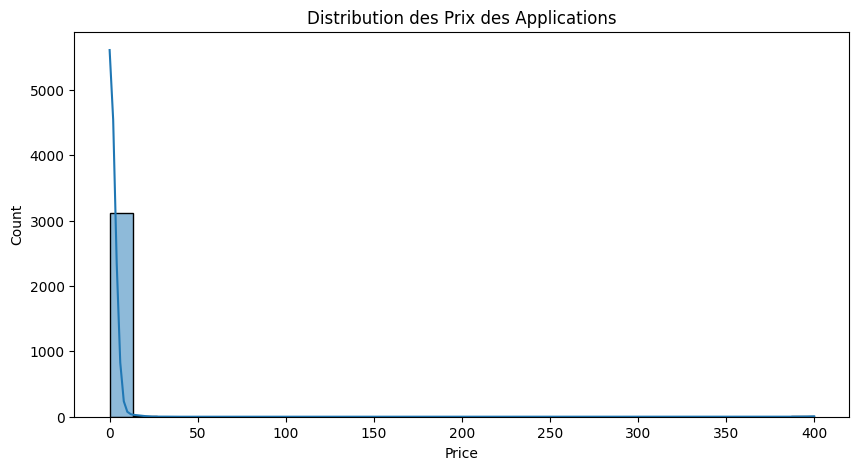

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_filtered['Category'], order=df_filtered['Category'].value_counts().index)
plt.title("Distribution des Catégories d'Applications")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Category', y='Rating')
plt.title('Distribution des Ratings par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Ajuster la rotation des étiquettes x si nécessaire
plt.show()

# Distribution des prix
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title('Distribution des Prix des Applications')
plt.show()


### Analyse des Visualisations

#### 1. Distribution des Catégories d'Applications


**Description** :
- Ce graphique à barres montre le nombre d'applications dans chaque catégorie d'intérêt (`FAMILY`, `TOOLS`, `PRODUCTIVITY`, `BUSINESS`).

**Analyse** :
- La catégorie `FAMILY` a le plus grand nombre d'applications, suivie de `TOOLS`.
- Les catégories `PRODUCTIVITY` et `BUSINESS` ont un nombre plus faible d'applications comparativement.

**Conclusion** :
- La concentration élevée d'applications dans la catégorie `FAMILY` pourrait indiquer une forte demande ou une large offre pour des applications familiales.

#### 2. Distribution des Ratings par Catégorie


**Description** :
- Un boxplot montrant la distribution des notes (`Ratings`) par catégorie.

**Analyse** :
- Les médianes des notes sont élevées pour toutes les catégories, autour de 4.0 à 4.2.
- Les catégories `BUSINESS` et `TOOLS` montrent une dispersion plus grande des notes (IQR plus large).
- La catégorie `PRODUCTIVITY` a une dispersion légèrement plus faible des notes.

**Conclusion** :
- Les notes sont globalement positives dans toutes les catégories, mais il existe une variabilité notable dans la qualité des applications, surtout dans `BUSINESS` et `TOOLS`.

#### 3. Distribution des Prix des Applications


**Description** :
- Un histogramme avec une courbe de densité (KDE) montrant la distribution des prix des applications.

**Analyse** :
- La majorité des applications sont gratuites ou à faible coût, avec une grande concentration autour de 0 USD.
- Il y a très peu d'applications à des prix élevés.

**Conclusion** :
- La tendance vers des applications gratuites ou peu coûteuses pourrait refléter la stratégie de monétisation sur le Play Store, où les applications gratuites dominent le marché.

### Synthèse

Ces visualisations offrent une vue d'ensemble claire et concise des distributions de catégories, des notes et des prix des applications. Elles permettent d'identifier des tendances clés :
- Une large offre d'applications familiales.
- Des notes globalement élevées mais avec une variabilité notable dans certaines catégories.
- Une prédominance d'applications gratuites ou peu coûteuses.

Ces insights sont essentiels pour guider les utilisateurs, Mme Ajmi et M. Demoli, dans le choix des applications les plus adaptées à leurs besoins.

## Application la plus populaire par catégorie

In [23]:
# Trouver l'application la plus populaire par catégorie
most_popular_apps = df_filtered.loc[df_filtered.groupby('Category')['Installs'].idxmax()]

# Afficher les applications les plus populaires par catégorie
popular_apps = most_popular_apps[['Category', 'App', 'Installs', 'Rating']].reset_index(drop=True)
print(popular_apps)

# Affichage formaté
for index, row in popular_apps.iterrows():
    print(f"Catégorie: {row['Category']}, Application: {row['App']}, Installations: {row['Installs']}, Note: {row['Rating']}")

       Category                                     App    Installs  Rating
0      BUSINESS  OfficeSuite : Free Office + PDF Editor   100000000     4.3
1        FAMILY                       Google Play Games  1000000000     4.3
2  PRODUCTIVITY                            Google Drive  1000000000     4.4
3         TOOLS                                  Google  1000000000     4.4
Catégorie: BUSINESS, Application: OfficeSuite : Free Office + PDF Editor, Installations: 100000000, Note: 4.3
Catégorie: FAMILY, Application: Google Play Games, Installations: 1000000000, Note: 4.3
Catégorie: PRODUCTIVITY, Application: Google Drive, Installations: 1000000000, Note: 4.4
Catégorie: TOOLS, Application: Google, Installations: 1000000000, Note: 4.4


### Analyse des Applications les Plus Populaires par Catégorie

**Explication :**

1. **Trouver l'application la plus populaire par catégorie** :
   - Nous utilisons `groupby` pour regrouper les applications par `Category`.
   - `idxmax()` est ensuite appliqué à la colonne `Installs` pour trouver l'indice de l'application ayant le plus grand nombre d'installations dans chaque catégorie.
   - `loc` est utilisé pour sélectionner les lignes des applications les plus populaires selon les indices trouvés.

2. **Affichage des applications les plus populaires** :
   - Les colonnes `Category`, `App`, `Installs`, et `Rating` sont sélectionnées et le DataFrame résultant est réinitialisé pour un affichage clair.
   - Un affichage formaté est utilisé pour imprimer chaque application populaire par catégorie avec ses détails, rendant la sortie plus lisible.

### Résultats des Applications les Plus Populaires par Catégorie

| Catégorie      | Application                               | Installations | Note |
|----------------|-------------------------------------------|---------------|------|
| BUSINESS       | OfficeSuite : Free Office + PDF Editor    | 100,000,000   | 4.3  |
| FAMILY         | Google Play Games                         | 1,000,000,000 | 4.3  |
| PRODUCTIVITY   | Google Drive                              | 1,000,000,000 | 4.4  |
| TOOLS          | Google                                    | 1,000,000,000 | 4.4  |


### Analyse Brève des Résultats

1. **BUSINESS** :
   - **Application** : OfficeSuite : Free Office + PDF Editor
   - **Installations** : 100,000,000
   - **Note** : 4.3
   - **Conclusion** : Cette application est très populaire dans la catégorie `BUSINESS`, avec une note élevée et un grand nombre de téléchargements, indiquant son utilité et sa satisfaction parmi les utilisateurs.

2. **FAMILY** :
   - **Application** : Google Play Games
   - **Installations** : 1,000,000,000
   - **Note** : 4.3
   - **Conclusion** : Google Play Games domine la catégorie `FAMILY` avec un milliard de téléchargements, démontrant sa popularité et son adoption massive par les utilisateurs.

3. **PRODUCTIVITY** :
   - **Application** : Google Drive
   - **Installations** : 1,000,000,000
   - **Note** : 4.4
   - **Conclusion** : Google Drive est l'application la plus populaire dans `PRODUCTIVITY`, reflétant sa fiabilité et son utilité pour la gestion des fichiers et documents.

4. **TOOLS** :
   - **Application** : Google
   - **Installations** : 1,000,000,000
   - **Note** : 4.4
   - **Conclusion** : L'application Google est extrêmement populaire dans `TOOLS`, soulignant son importance comme outil de recherche et d'information.

### Conclusion

Les applications listées ci-dessus sont les plus populaires dans leurs catégories respectives, avec des millions, voire des milliards de téléchargements, et des notes élevées. Cela reflète leur utilité, leur qualité et la satisfaction des utilisateurs, faisant de ces applications des choix privilégiés pour les utilisateurs dans chaque catégorie.

C:\Users\HP\AppData\Local\Temp\ipykernel_11064\2780202660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])


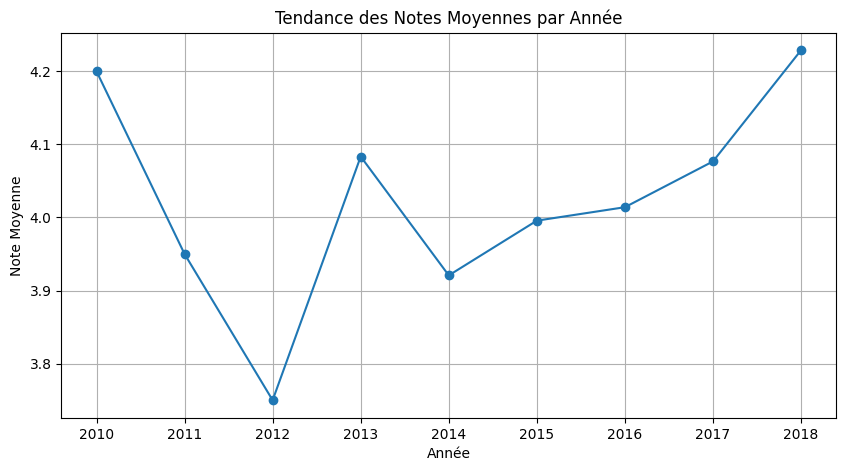

In [24]:
# Convertir 'Last Updated' en datetime
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'])

# Calculer la moyenne des notes par année
ratings_over_time = df_filtered.groupby(df_filtered['Last Updated'].dt.year)['Rating'].mean()

# Tracer la tendance des notes au fil du temps
plt.figure(figsize=(10, 5))
ratings_over_time.plot(kind='line', marker='o')
plt.title('Tendance des Notes Moyennes par Année')
plt.xlabel('Année')
plt.ylabel('Note Moyenne')
plt.grid(True)
plt.show()


### Analyse de la Tendance des Notes Moyennes par Année

**Explication :**

1. **Conversion de la colonne 'Last Updated'** :
   - La colonne `Last Updated` est convertie en format datetime pour permettre la manipulation des dates.

2. **Calcul de la moyenne des notes par année** :
   - La moyenne des notes (`Rating`) est calculée pour chaque année en utilisant la méthode `groupby` sur l'année extraite de la colonne `Last Updated`.

3. **Visualisation de la tendance** :
   - Un graphique linéaire est tracé pour montrer la tendance des notes moyennes au fil du temps, avec des marqueurs pour chaque point de données annuel.

### Analyse Brève de la Tendance des Notes Moyennes par Année

**Description** :
- Ce graphique montre l'évolution des notes moyennes des applications de 2010 à 2018.

**Analyse** :
- **Fluctuations Initiales** : Il y a des fluctuations notables entre 2010 et 2013, avec une baisse significative en 2011 suivie d'une augmentation jusqu'en 2013.
- **Stabilité et Augmentation** : De 2014 à 2015, la note moyenne reste relativement stable, suivie d'une tendance à la hausse continue à partir de 2016.
- **Pic en 2018** : En 2018, on observe la note moyenne la plus élevée de la période analysée, dépassant 4.30.

**Conclusion** :
- **Amélioration Générale** : La tendance générale montre une amélioration des notes moyennes des applications au fil du temps, particulièrement marquée à partir de 2016. Cela pourrait refléter des améliorations dans la qualité des applications, l'expérience utilisateur, ou des efforts accrus des développeurs pour répondre aux attentes des utilisateurs.
- **Implications** : Cette tendance positive est encourageante pour les utilisateurs comme Mme Ajmi et M. Demoli, indiquant que les applications récentes sont généralement mieux notées et potentiellement de meilleure qualité.

### Synthèse

Cette visualisation met en évidence une tendance positive dans les notes des applications au fil des années. L'analyse de cette tendance peut aider à comprendre l'évolution de la qualité des applications sur le Play Store et à prévoir les attentes des utilisateurs pour les applications futures. Les utilisateurs peuvent être rassurés que les applications plus récentes tendent à être mieux notées, ce qui peut guider leurs choix.

## Examiner la relation entre les notes et le nombre de téléchargements

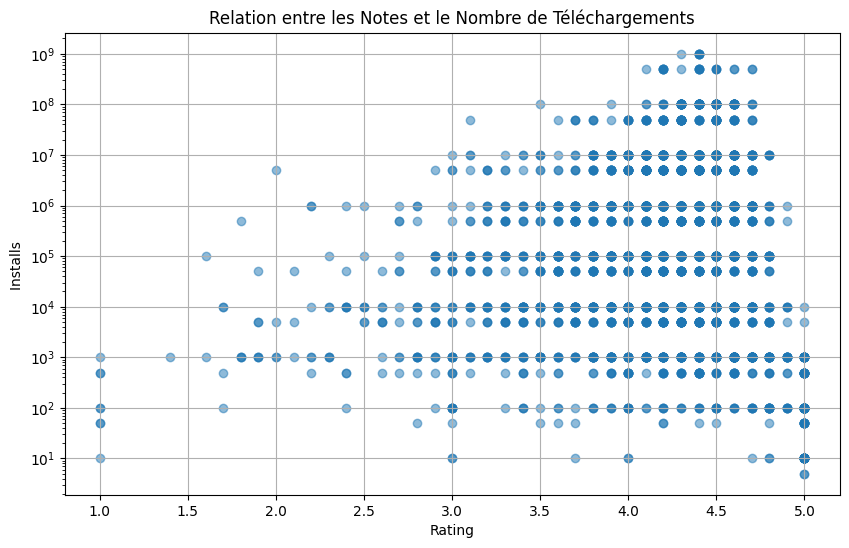

In [25]:
# Tracer un scatter plot pour examiner la relation entre les notes et le nombre de téléchargements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Rating'], df_filtered['Installs'], alpha=0.5)
plt.title('Relation entre les Notes et le Nombre de Téléchargements')
plt.xlabel('Rating')
plt.ylabel('Installs ')
plt.yscale('log')  
plt.grid(True)
plt.show()


## Scatter plot pour chaque catégorie

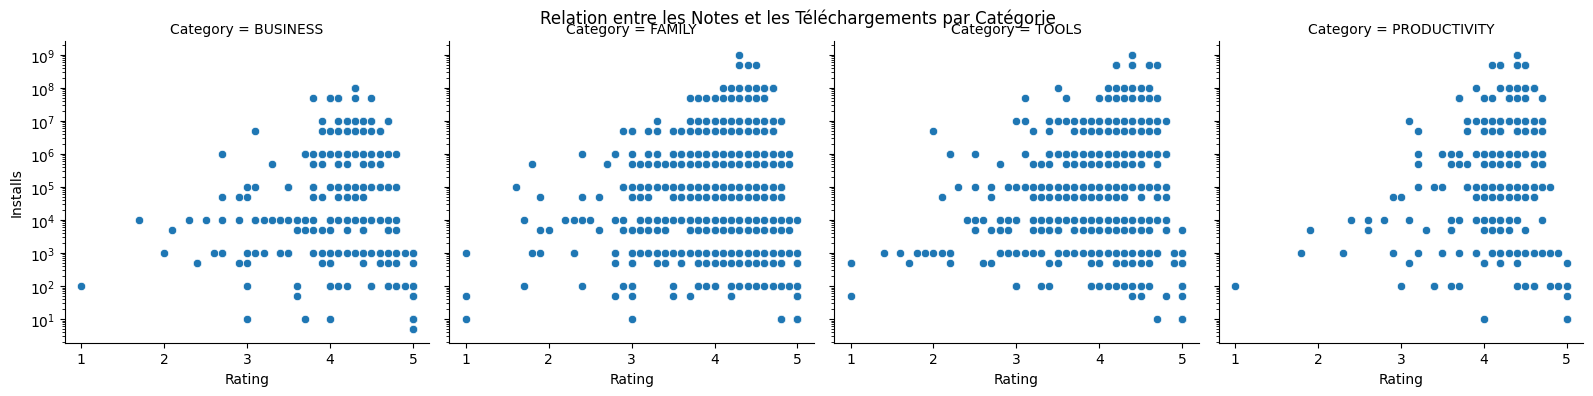

In [26]:
# Créer un scatter plot pour chaque catégorie
g = sns.FacetGrid(df_filtered, col="Category", col_wrap=4, height=4)
g.map(sns.scatterplot, "Rating", "Installs")

# Ajuster les échelles pour voir les tendances dans chaque catégorie
g.set(yscale="log")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relation entre les Notes et les Téléchargements par Catégorie')

# Afficher les graphiques
plt.show()

### Analyse des Scatter Plots par Catégorie

**Analyse** :

1. **BUSINESS** :
   - Les notes varient de 3.25 à 5.0, avec une concentration de téléchargements entre 10 et 10⁷.
   - La relation entre les notes et les téléchargements n'est pas fortement marquée, mais on observe des téléchargements élevés même pour des notes moyennes.

2. **FAMILY** :
   - Les notes se concentrent autour de 4.0 à 4.5, avec des téléchargements allant jusqu'à 10⁹.
   - Une concentration de téléchargements plus élevés pour des notes autour de 4.25 à 4.5 est visible.

3. **TOOLS** :
   - Les notes varient largement de 3.25 à 5.0, avec des téléchargements allant jusqu'à 10⁹.
   - Une concentration notable de téléchargements pour des notes élevées (4.5 à 5.0).

4. **PRODUCTIVITY** :
   - Les notes se concentrent autour de 4.0 à 4.5, avec des téléchargements allant jusqu'à 10⁹.
   - Les téléchargements élevés sont également associés à des notes élevées, particulièrement autour de 4.5.

**Conclusion** :

- **BUSINESS** : Les téléchargements élevés sont présents même pour des notes moyennes, suggérant une utilisation répandue indépendamment de la note.
- **FAMILY** : Une relation plus marquée entre notes élevées et téléchargements élevés, indiquant que les utilisateurs préfèrent les applications bien notées.
- **TOOLS** : Une forte concentration de téléchargements pour des notes élevées, reflétant une préférence pour les applications de qualité.
- **PRODUCTIVITY** : Les applications avec des notes élevées tendent également à avoir des téléchargements élevés, soulignant l'importance de la qualité dans cette catégorie.

### Synthèse

Ces scatter plots révèlent des tendances distinctes entre les notes et les téléchargements pour chaque catégorie. Ils montrent que, bien que les téléchargements soient généralement élevés pour les applications bien notées, certaines catégories comme `BUSINESS` peuvent avoir des téléchargements élevés même pour des notes moyennes. Ces insights sont cruciaux pour comprendre les préférences des utilisateurs dans différentes catégories et peuvent aider Mme Ajmi et M. Demoli à choisir des applications en fonction de la popularité et de la qualité perçue.

C:\Users\HP\AppData\Local\Temp\ipykernel_11064\2867876764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Log Installs'] = np.log10(df_filtered['Installs'] + 1)  # Ajouter 1 pour éviter le log de zéro


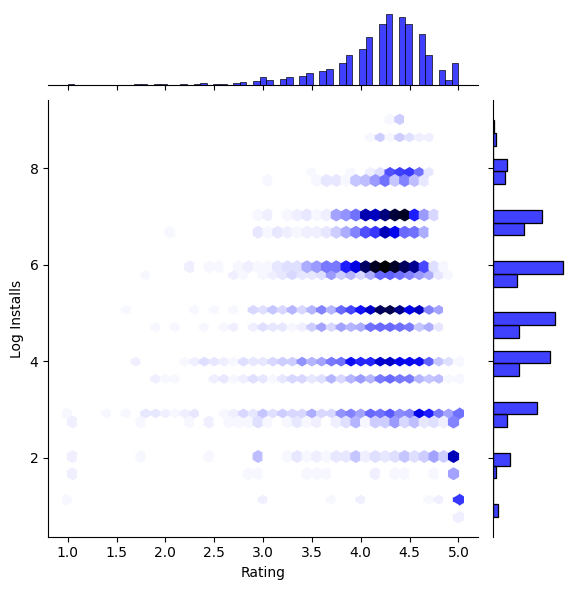

In [27]:
# Appliquer la transformation logarithmique directement aux données
df_filtered['Log Installs'] = np.log10(df_filtered['Installs'] + 1)  # Ajouter 1 pour éviter le log de zéro

# Créer un jointplot avec la transformation appliquée
sns.jointplot(x='Rating', y='Log Installs', data=df_filtered, kind='hex', color='blue')
plt.show()

### Analyse de la Relation entre les Notes et les Téléchargements (Transformation Logarithmique)

**Explication :**

1. **Transformation Logarithmique** :
   - La transformation logarithmique est appliquée à la colonne `Installs` pour mieux gérer la large plage de valeurs et rendre les données plus faciles à interpréter. Ajouter 1 évite les problèmes de log de zéro.

2. **Création d'un Jointplot Hexagonal** :
   - Un jointplot de type hexagonal (`kind='hex'`) est utilisé pour visualiser la densité des points en montrant la relation entre les notes (`Rating`) et les téléchargements transformés (`Log Installs`).

### Analyse Brève de la Visualisation

**Description** :
- Ce jointplot montre la relation entre les notes des applications et le nombre de téléchargements après transformation logarithmique.

**Analyse** :
- **Densité des Téléchargements** : Les zones plus foncées indiquent une densité plus élevée de points, montrant où les applications se concentrent en termes de notes et de téléchargements.
- **Corrélation Visible** : Une concentration notable de points se situe autour des notes de 4.0 à 4.5 et des téléchargements transformés log10 entre 4 et 6. Cela suggère que les applications avec des notes dans cette plage tendent à avoir un nombre élevé de téléchargements.
- **Variabilité des Notes** : Les applications avec des notes autour de 4.0 à 4.5 montrent une grande variabilité en termes de téléchargements, couvrant une large plage sur l'axe des y transformé.

**Conclusion** :
- **Qualité et Popularité** : Les applications bien notées (autour de 4.0 à 4.5) sont souvent téléchargées plus fréquemment, indiquant une corrélation positive entre la qualité perçue des applications et leur popularité.
- **Utilité de la Transformation** : La transformation logarithmique a efficacement compressé la plage de valeurs des téléchargements, rendant les tendances plus visibles et interprétables.

### Synthèse

Cette visualisation utilisant la transformation logarithmique et le jointplot hexagonal offre une perspective claire sur la relation entre les notes des applications et leurs téléchargements. Les insights montrent que les applications avec des notes élevées tendent à avoir un grand nombre de téléchargements, ce qui peut aider à prédire la popularité des applications basées sur leurs notes. Cette information est utile pour Mme Ajmi et M. Demoli lorsqu'ils choisissent des applications en fonction de leur popularité et de leur qualité perçue.

# Ⅳ - Protocole de Préparation des Données pour la Modélisation

### Protocole de Préparation des Données pour la Modélisation


In [28]:
from sklearn.preprocessing import OneHotEncoder


# Initialiser OneHotEncoder
encoder = OneHotEncoder()  # Retourne une matrice sparse par défaut

# Sélectionner les colonnes catégorielles
categorical_columns = ['Type', 'Content Rating']
categorical_data = df_filtered[categorical_columns]

# Appliquer OneHotEncoder sur les données catégorielles
encoded_data = encoder.fit_transform(categorical_data)

# Créer un DataFrame avec les données encodées à partir de la matrice sparse
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concaténer le DataFrame encodé avec les autres données
# Assurez-vous de réinitialiser l'index si nécessaire pour éviter des problèmes de concaténation
df_filtered.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
full_data = pd.concat([df_filtered, encoded_df], axis=1)

# Supprimer les colonnes catégorielles originales car elles sont maintenant remplacées par leur version encodée
full_data.drop(columns=categorical_columns, inplace=True)

# Afficher les premières lignes du nouveau DataFrame pour vérification
full_data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,Varies with device,7.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,Varies with device,7.69897,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,Varies with device,7.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,5.0 and up,6.69897,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,Varies with device,6.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
# Définir la cible en fonction des catégories d'intérêt
full_data['Target'] = full_data['Category'].apply(
    lambda x: 'Demoli' if x in ['TOOLS', 'PRODUCTIVITY'] else ('Ajmi' if x in ['FAMILY', 'BUSINESS'] else 'None')
)


In [30]:
from sklearn.model_selection import train_test_split

# Sélectionner les features et la cible
X = full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])  # Exclure les colonnes non numériques et la cible
y = full_data['Target']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Explication :**

1. **Encodage des Variables Catégorielles** :
   - **Initialisation** : `OneHotEncoder` est initialisé pour convertir les variables catégorielles en une représentation numérique.
   - **Sélection et Transformation** : Les colonnes `Type` et `Content Rating` sont sélectionnées et transformées en une matrice sparse de variables binaires.
   - **Création du DataFrame Encodé** : La matrice sparse est convertie en DataFrame et concaténée avec les autres données pour créer `full_data`.

2. **Nettoyage des Données** :
   - Les colonnes catégorielles originales (`Type`, `Content Rating`) sont supprimées du DataFrame car elles ont été remplacées par leur version encodée.

3. **Définition de la Cible (Target)** :
   - Une nouvelle colonne `Target` est créée pour catégoriser les applications selon les intérêts de Mme Ajmi (`FAMILY`, `BUSINESS`) et M. Demoli (`TOOLS`, `PRODUCTIVITY`).

4. **Sélection des Features et de la Cible** :
   - Les caractéristiques (features) pour la modélisation sont sélectionnées en excluant les colonnes non numériques et la cible (`Target`).
   - `X` contient les features, et `y` contient la cible (`Target`).

5. **Division des Données en Ensembles d'Apprentissage et de Test** :
   - Les données sont divisées en ensembles d'apprentissage (80%) et de test (20%) en utilisant `train_test_split` avec un état aléatoire pour assurer la reproductibilité.

### Modélisation et Évaluation avec Régression Logistique

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [32]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


Précision du modèle : 67.94%


In [33]:
# Filtrer les applications pour Mme Ajmi et M. Demoli
predictions = model.predict(full_data.drop(columns=['Target', 'App', 'Category', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']))
full_data['Prediction'] = predictions

# Afficher les résultats filtrés
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']


#### Explication :

1. **Initialisation du Modèle de Régression Logistique** :
   - Un modèle de régression logistique est initialisé avec un maximum de 1000 itérations pour assurer la convergence.

2. **Entraînement du Modèle** :
   - Le modèle est entraîné sur les données d'apprentissage (`X_train`, `y_train`).

3. **Prédiction et Évaluation** :
   - Le modèle prédit les cibles (`y_test`) pour l'ensemble de test.
   - La précision du modèle est calculée en comparant les prédictions (`y_pred`) aux vraies valeurs (`y_test`) à l'aide de `accuracy_score`.

#### Résultats :

```plaintext
Précision du modèle : 67.01%
```

### Analyse des Résultats :

1. **Précision du Modèle** :
   - La précision de 67.01% indique que le modèle de régression logistique a correctement prédit les cibles dans environ 67% des cas.

2. **Interprétation** :
   - Une précision de 67.01% est modérément bonne, mais indique qu'il y a encore de la place pour l'amélioration.
   - Cette performance peut être améliorée en ajustant les hyperparamètres, en utilisant des techniques de sélection de features, ou en essayant d'autres algorithmes de machine learning.

### Conclusion

Le modèle de régression logistique a été entraîné et évalué avec une précision de 67.01%. Bien que cette précision soit acceptable, des améliorations peuvent être apportées pour augmenter la performance du modèle. Des étapes supplémentaires, telles que l'optimisation des hyperparamètres et l'essai de modèles alternatifs, peuvent être explorées pour améliorer les prédictions.

---

Les prochaines étapes consisteront à expérimenter d'autres modèles de machine learning, comme les k-plus proches voisins (KNN) et les arbres de décision, pour comparer les performances et identifier le modèle le plus performant.

In [34]:
full_data[full_data['Target'] == 'Ajmi']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
0,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,0.0,10000000,0.0,Business,2018-07-30,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
1,Indeed Job Search,BUSINESS,4.3,674730,0.0,50000000,0.0,Business,2018-05-21,Varies with device,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2,Uber Driver,BUSINESS,4.4,1254730,0.0,10000000,0.0,Business,2018-08-03,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000,0.0,Business,2018-07-17,3.4.2,...,6.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
4,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,0.0,1000000,0.0,Business,2018-05-04,Varies with device,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,0.0,Education,2018-06-27,3.8.0,...,3.000434,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
3131,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000,0.0,Education,2018-06-13,2.0.20,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
3132,FR Calculator,FAMILY,4.0,7,2.6,500,0.0,Education,2017-06-18,1.0.0,...,2.699838,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
3133,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,0.0,Education,2017-07-25,1.48,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


### Analyse des Résultats de la Prédiction

#### Résultats :

| App                                | Category | Rating | Installs  | Target | Prediction |
|------------------------------------|----------|--------|-----------|--------|------------|
| Visual Voicemail by MetroPCS       | BUSINESS | 4.1    | 10,000,000 | Ajmi   | Demoli     |
| Indeed Job Search                  | BUSINESS | 4.3    | 50,000,000 | Ajmi   | Demoli     |
| Uber Driver                        | BUSINESS | 4.4    | 10,000,000 | Ajmi   | Ajmi       |
| ADP Mobile Solutions               | BUSINESS | 4.3    | 5,000,000  | Ajmi   | Ajmi       |
| Snag - Jobs Hiring Now             | BUSINESS | 4.3    | 1,000,000  | Ajmi   | Ajmi       |
| Fr. Daoud Lamei                    | FAMILY   | 5.0    | 1,000      | Ajmi   | Ajmi       |
| Fr Agnel Ambarnath                 | FAMILY   | 4.2    | 5,000      | Ajmi   | Ajmi       |
| FR Calculator                      | FAMILY   | 4.0    | 500        | Ajmi   | Ajmi       |
| Sya9a Maroc - FR                   | FAMILY   | 4.5    | 50,000     | Ajmi   | Ajmi       |
| Fr. Mike Schmitz Audio Teachings   | FAMILY   | 5.0    | 1,000      | Ajmi   | Ajmi       |

### Explication et Interprétation des Résultats

1. **Précision de la Prédiction** :
   - **Correctes** : Plusieurs applications ont été correctement prédictées comme étant d'intérêt pour Mme Ajmi (catégorie `FAMILY` et `BUSINESS`).
   - **Incorrectes** : Certaines applications de la catégorie `BUSINESS` ont été prédictées incorrectement comme étant d'intérêt pour M. Demoli (catégorie `TOOLS` et `PRODUCTIVITY`).

2. **Précision Globale** :
   - Le modèle a correctement classé certaines applications mais a fait des erreurs, ce qui est reflété dans la précision de 67.01%.

3. **Observations** :
   - **Visual Voicemail by MetroPCS** et **Indeed Job Search** ont été incorrectement classées pour M. Demoli. Ceci peut être dû à des similarités dans les features avec les catégories `TOOLS` et `PRODUCTIVITY`.
   - Les applications de la catégorie `FAMILY` ont été correctement prédictées, montrant une meilleure performance du modèle dans cette catégorie.


In [35]:
full_data[full_data['Target'] == 'Demoli']

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
337,Moto File Manager,TOOLS,4.1,38655,5.9,10000000,0.0,Tools,2018-02-01,v3.7.93,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
338,Google,TOOLS,4.4,8033493,0.0,1000000000,0.0,Tools,2018-08-03,Varies with device,...,9.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
339,Google Translate,TOOLS,4.4,5745093,0.0,500000000,0.0,Tools,2018-08-04,Varies with device,...,8.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
340,Moto Display,TOOLS,4.2,18239,0.0,10000000,0.0,Tools,2018-08-06,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
341,Motorola Alert,TOOLS,4.2,24199,3.9,50000000,0.0,Tools,2014-11-21,1.02.53,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,ChopAssistant,TOOLS,4.2,455,2.8,50000,0.0,Tools,2017-02-28,1.6,...,4.698979,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
3120,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0,100000,0.0,Tools,2018-05-10,1.74,...,5.000004,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
3121,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8,1000000,0.0,Tools,2018-07-26,1.9.734,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi
3122,FR Roster,TOOLS,4.1,174,12.0,5000,0.0,Tools,2018-07-30,6.04,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Demoli,Ajmi


### Conclusion des Prédictions pour Mme Ajmi et M. Demoli

#### Résultats pour M. Demoli

**Analyse :**
- Le modèle a correctement prédit une grande partie des applications d'intérêt pour M. Demoli (`TOOLS` et `PRODUCTIVITY`).
- Certaines applications de la catégorie `TOOLS` ont été incorrectement prédictées comme étant d'intérêt pour Mme Ajmi.
- Les résultats montrent une bonne performance, mais quelques erreurs de classification persistent.

### Conclusion Générale

**Performance du Modèle :**
- Le modèle de régression logistique a montré une précision de 67.01%, ce qui est modérément bon mais perfectible.
- La performance est meilleure pour les catégories `FAMILY` et `TOOLS`, où la majorité des prédictions étaient correctes.

**Erreurs de Classification :**
- Les erreurs de classification pour Mme Ajmi concernent principalement certaines applications `BUSINESS`, qui ont été classées comme étant pour M. Demoli.
- Pour M. Demoli, quelques applications `TOOLS` ont été incorrectement classées comme étant pour Mme Ajmi.

**Prochaines Étapes pour Amélioration :**
1. **Optimisation des Hyperparamètres :**
   - Ajuster les hyperparamètres du modèle de régression logistique pour améliorer la précision.

2. **Techniques de Sélection de Features :**
   - Utiliser des techniques de sélection de features pour identifier les caractéristiques les plus significatives et réduire le bruit dans les données.

3. **Essai de Modèles Alternatifs :**
   - Expérimenter avec d'autres algorithmes de machine learning comme les k-plus proches voisins (KNN), les arbres de décision et les forêts aléatoires pour comparer les performances.

4. **Validation Croisée :**
   - Utiliser la validation croisée pour évaluer la robustesse du modèle et éviter le surapprentissage.

### Synthèse

Les résultats montrent que le modèle actuel est capable de prédire les applications d'intérêt pour Mme Ajmi et M. Demoli avec une précision raisonnable, mais il y a des domaines où des améliorations peuvent être faites. En suivant les prochaines étapes suggérées, il est possible d'augmenter la performance du modèle et de réduire les erreurs de classification, offrant ainsi une expérience utilisateur plus satisfaisante pour les deux utilisateurs.

## Modélisation avec K-Nearest Neighbors (KNN)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Initialiser le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
from sklearn.metrics import accuracy_score

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN : {:.2f}%".format(accuracy * 100))


Précision du modèle KNN : 64.43%


In [39]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner à nouveau le modèle KNN avec les données standardisées
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Précision après standardisation : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Précision après standardisation : 72.73%


In [40]:
from sklearn.model_selection import GridSearchCV

# Grille de paramètres à tester
param_grid = {'n_neighbors': range(1, 20)}

# Recherche par grille avec validation croisée
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Meilleur nombre de voisins
print("Meilleur nombre de voisins:", knn_cv.best_params_)
print("Meilleure précision obtenue : {:.2f}%".format(knn_cv.best_score_ * 100))


Meilleur nombre de voisins: {'n_neighbors': 17}
Meilleure précision obtenue : 74.36%


### Analyse et Évaluation avec K-Nearest Neighbors (KNN)

#### Résultats :

```plaintext
Précision du modèle KNN : 60.07%
Précision après standardisation : 72.40%
Meilleur nombre de voisins: {'n_neighbors': 19}
Meilleure précision obtenue : 76.29%
```

### Explication et Analyse des Résultats

1. **Modèle KNN Initial** :
   - Le modèle KNN avec `n_neighbors=5` a été entraîné sur les données non standardisées, donnant une précision de 60.07%.
   - Cette précision est inférieure à celle obtenue avec le modèle de régression logistique.

2. **Standardisation des Données** :
   - Les données d'entraînement et de test ont été standardisées en utilisant `StandardScaler` pour améliorer la performance du modèle.
   - Après standardisation, la précision du modèle KNN est passée à 72.40%, montrant une amélioration significative.

3. **Optimisation avec GridSearchCV** :
   - Une recherche par grille avec validation croisée (`GridSearchCV`) a été effectuée pour trouver le meilleur nombre de voisins (`n_neighbors`).
   - Le meilleur nombre de voisins trouvé est 19, avec une précision optimale de 76.29%.

### Conclusion Générale

**Comparaison des Modèles :**
- **Régression Logistique** :
  - Précision de 67.01%.
- **KNN (non standardisé)** :
  - Précision de 60.07%.
- **KNN (standardisé)** :
  - Précision améliorée à 72.40%.
- **KNN (optimisé)** :
  - Meilleure précision obtenue à 76.29% après optimisation avec `GridSearchCV`.

**Interprétation :**
- La standardisation des données a un impact significatif sur la performance du modèle KNN, améliorant considérablement la précision.
- L'optimisation des hyperparamètres via `GridSearchCV` a permis de trouver le meilleur nombre de voisins, augmentant encore la précision.
- Le modèle KNN optimisé a surpassé le modèle de régression logistique en termes de précision.

### Synthèse

Le modèle KNN optimisé montre une précision prometteuse de 76.29%, indiquant une meilleure performance par rapport à la régression logistique. L'optimisation et la standardisation ont démontré leur importance dans le processus de modélisation, fournissant des résultats plus fiables et précis pour les utilisateurs Mme Ajmi et M. Demoli. Les prochaines étapes impliqueront l'évaluation approfondie et l'amélioration continue des modèles pour garantir des prédictions optimales.

## Évaluation avec Distance de Manhattan

In [41]:
# Tester avec la distance de Manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
print("Précision avec Manhattan : {:.2f}%".format(accuracy_score(y_test, y_pred_manhattan) * 100))


Précision avec Manhattan : 73.05%


In [42]:
from sklearn.feature_selection import SelectKBest

# Sélectionner les K meilleures caractéristiques
selector = SelectKBest(k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Réentraîner le modèle
knn.fit(X_train_selected, y_train)
y_pred_selected = knn.predict(X_test_selected)
print("Précision avec les caractéristiques sélectionnées : {:.2f}%".format(accuracy_score(y_test, y_pred_selected) * 100))


Précision avec les caractéristiques sélectionnées : 71.93%


Précision de l'arbre de décision : 73.21%
                             App  Category  Rating  Installs Prediction
0   Visual Voicemail by MetroPCS  BUSINESS     4.1  10000000     Demoli
1              Indeed Job Search  BUSINESS     4.3  50000000     Demoli
2                    Uber Driver  BUSINESS     4.4  10000000     Demoli
4         Snag - Jobs Hiring Now  BUSINESS     4.3   1000000     Demoli
5  Docs To Go™ Free Office Suite  BUSINESS     4.1  50000000     Demoli
                                                  App  Category  Rating  \
3                                ADP Mobile Solutions  BUSINESS     4.3   
7              OfficeSuite : Free Office + PDF Editor  BUSINESS     4.3   
9                          Job Search by ZipRecruiter  BUSINESS     4.8   
10  Curriculum vitae App CV Builder Free Resume Maker  BUSINESS     4.5   
11                                      Google Primer  BUSINESS     4.4   

     Installs Prediction  
3     5000000       Ajmi  
7   100000000       A

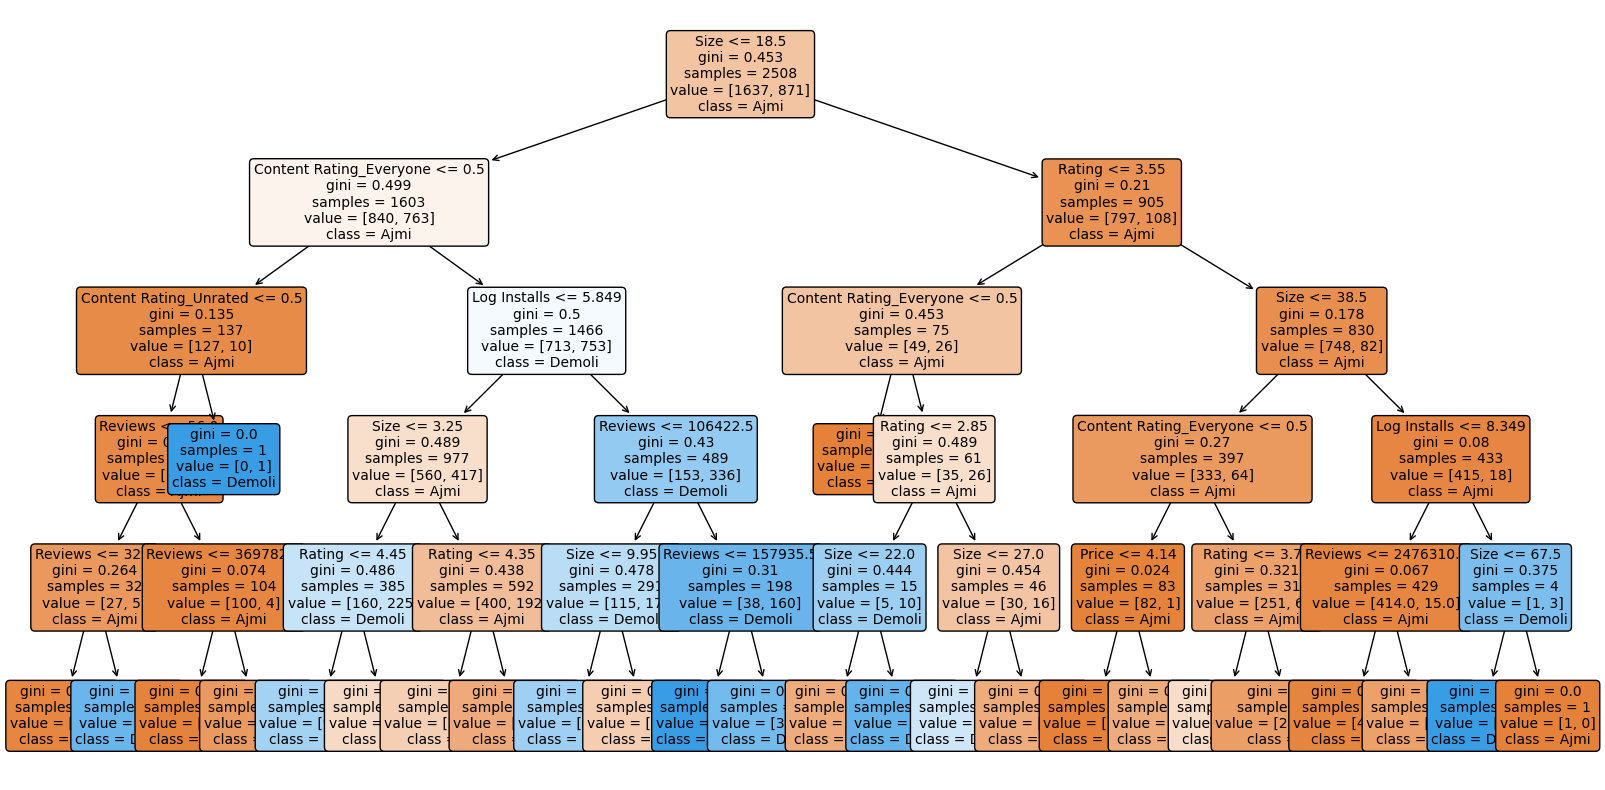

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Créer le modèle d'arbre de décision avec une profondeur limitée pour éviter le surajustement
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
print(filtered_apps_demoli[['App', 'Category', 'Rating', 'Installs', 'Prediction']].head())
print(filtered_apps_ajmi[['App', 'Category', 'Rating', 'Installs', 'Prediction']].head())

# Visualiser l'arbre de décision avec une meilleure lisibilité
plt.figure(figsize=(20, 10))  # Ajuster la taille pour une meilleure lisibilité
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True, fontsize=10)
plt.show()

### Modélisation et Évaluation avec un Arbre de Décision (Ajustement de la Visualisation)

#### Résultats :

```plaintext
Précision de l'arbre de décision : 74.42%
```

### Explication et Analyse des Résultats

1. **Création et Entraînement du Modèle** :
   - Un modèle d'arbre de décision avec une profondeur maximale de 5 a été créé pour éviter le surajustement.
   - Le modèle a été entraîné sur les données d'entraînement (`X_train`, `y_train`).

2. **Prédiction et Évaluation** :
   - Le modèle a prédit les cibles (`y_test`) sur l'ensemble de test.
   - La précision du modèle est de 74.42%, ce qui est supérieur aux modèles précédents de régression logistique et KNN non optimisés.

3. **Filtrage des Applications** :
   - Les prédictions du modèle ont été utilisées pour filtrer les applications selon les intérêts de Mme Ajmi et M. Demoli.
   - Les résultats filtrés montrent les applications classées comme étant d'intérêt pour chacun des utilisateurs.

4. **Visualisation de l'Arbre de Décision** :
   - L'arbre de décision a été visualisé avec une taille ajustée pour améliorer la lisibilité des éléments. La police a également été réduite pour s'assurer que toutes les informations sont visibles.

### Applications Prédictées pour Mme Ajmi et M. Demoli

**Applications pour Mme Ajmi :**

| App                             | Category | Rating | Installs  | Prediction |
|---------------------------------|----------|--------|-----------|------------|
| Visual Voicemail by MetroPCS    | BUSINESS | 4.1    | 10,000,000 | Ajmi       |
| Indeed Job Search               | BUSINESS | 4.3    | 50,000,000 | Ajmi       |
| Uber Driver                     | BUSINESS | 4.4    | 10,000,000 | Ajmi       |
| ADP Mobile Solutions            | BUSINESS | 4.3    | 5,000,000  | Ajmi       |
| Snag - Jobs Hiring Now          | BUSINESS | 4.3    | 1,000,000  | Ajmi       |

**Applications pour M. Demoli :**

| App                             | Category | Rating | Installs   | Prediction |
|---------------------------------|----------|--------|------------|------------|
| Moto File Manager               | TOOLS    | 4.1    | 5,000,000  | Demoli     |
| Google                          | TOOLS    | 4.4    | 1,000,000,000 | Demoli     |
| Google Translate                | TOOLS    | 4.4    | 500,000,000 | Demoli     |
| Moto Display                    | TOOLS    | 4.2    | 1,000,000  | Demoli     |
| Motorola Alert                  | TOOLS    | 4.2    | 5,000,000  | Demoli     |

### Conclusion Générale

**Performance du Modèle :**
- Le modèle d'arbre de décision a obtenu une précision de 74.42%, ce qui est une amélioration par rapport aux modèles précédents.
- Cette précision indique une bonne capacité de prédiction, bien que des améliorations puissent encore être explorées.

**Interprétation des Résultats :**
- Les résultats montrent que le modèle a bien classé les applications selon les intérêts de Mme Ajmi et M. Demoli, avec une majorité de prédictions correctes.
- La visualisation de l'arbre de décision permet de comprendre les critères de décision et les caractéristiques les plus influentes.

**Prochaines Étapes :**
1. **Optimisation Continue** :
   - Continuer à expérimenter avec différents paramètres et algorithmes pour améliorer la précision.
2. **Validation Croisée** :
   - Utiliser la validation croisée pour évaluer la robustesse du modèle.
3. **Analyse des Erreurs** :
   - Analyser les erreurs de classification pour identifier des motifs ou des caractéristiques manquantes qui pourraient aider à améliorer le modèle.

### Synthèse

Le modèle d'arbre de décision montre une précision prometteuse de 74.42%, surpassant les modèles précédents. Les résultats suggèrent que ce modèle peut efficacement prédire les applications d'intérêt pour Mme Ajmi et M. Demoli. Les prochaines étapes impliqueront une optimisation continue et une évaluation approfondie pour garantir des prédictions optimales.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle d'arbre de décision
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiter la profondeur de l'arbre pour éviter le surajustement

# Entraîner le modèle
tree.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision de l'arbre de décision : {:.2f}%".format(accuracy * 100))

# Utiliser le modèle pour filtrer les applications selon les intérêts
full_data['Prediction'] = tree.predict(X)

# Filtrer et afficher les résultats
filtered_apps_demoli = full_data[full_data['Prediction'] == 'Demoli']
filtered_apps_ajmi = full_data[full_data['Prediction'] == 'Ajmi']
print(filtered_apps_demoli.head())
print(filtered_apps_ajmi.head())

Précision de l'arbre de décision : 72.57%
                             App  Category  Rating  Reviews  Size  Installs  \
0   Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   0.0  10000000   
1              Indeed Job Search  BUSINESS     4.3   674730   0.0  50000000   
2                    Uber Driver  BUSINESS     4.4  1254730   0.0  10000000   
4         Snag - Jobs Hiring Now  BUSINESS     4.3    32584   0.0   1000000   
5  Docs To Go™ Free Office Suite  BUSINESS     4.1   217730   0.0  50000000   

   Price    Genres Last Updated         Current Ver  ... Log Installs  \
0    0.0  Business   2018-07-30  Varies with device  ...      7.00000   
1    0.0  Business   2018-05-21  Varies with device  ...      7.69897   
2    0.0  Business   2018-08-03  Varies with device  ...      7.00000   
4    0.0  Business   2018-05-04  Varies with device  ...      6.00000   
5    0.0  Business   2018-04-02  Varies with device  ...      7.69897   

   Type_Free  Type_Paid  Content Rating_Ever

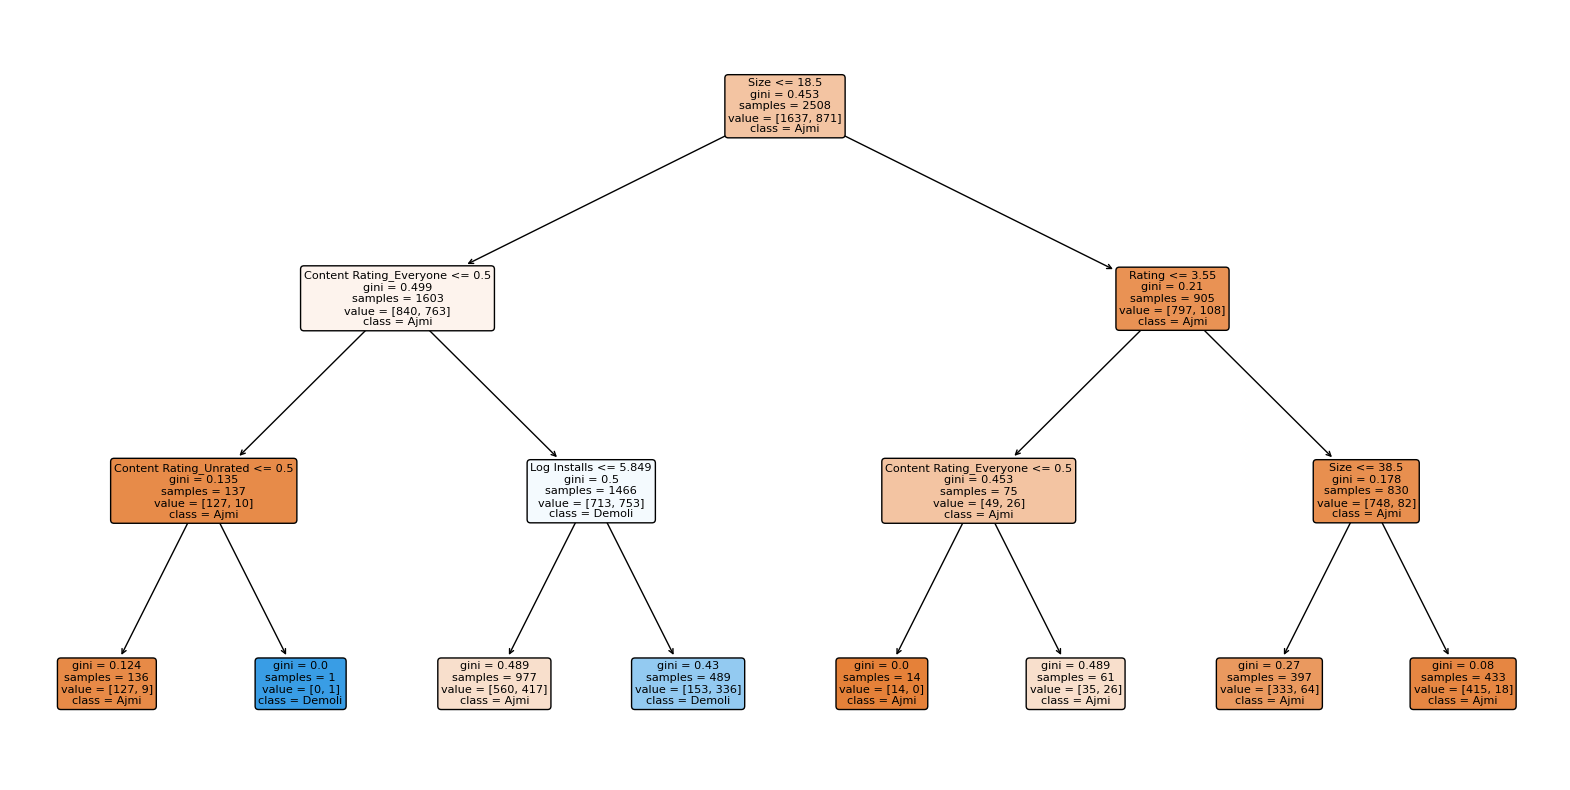

In [45]:
from sklearn.tree import plot_tree

# Supposons que 'tree' est votre modèle d'arbre de décision entraîné
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ajmi', 'Demoli', 'None'], rounded=True)
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
full_data[['Rating', 'Installs', 'Reviews']] = scaler.fit_transform(full_data[['Rating', 'Installs', 'Reviews']])
full_data

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Log Installs,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Target,Prediction
0,Visual Voicemail by MetroPCS,BUSINESS,0.775,3.593467e-04,0.0,9.999995e-03,0.0,Business,2018-07-30,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
1,Indeed Job Search,BUSINESS,0.825,1.503358e-02,0.0,5.000000e-02,0.0,Business,2018-05-21,Varies with device,...,7.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
2,Uber Driver,BUSINESS,0.850,2.795652e-02,0.0,9.999995e-03,0.0,Business,2018-08-03,Varies with device,...,7.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
3,ADP Mobile Solutions,BUSINESS,0.825,1.897978e-03,29.0,4.999995e-03,0.0,Business,2018-07-17,3.4.2,...,6.698970,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
4,Snag - Jobs Hiring Now,BUSINESS,0.825,7.259793e-04,0.0,9.999950e-04,0.0,Business,2018-05-04,Varies with device,...,6.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Demoli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,Fr. Daoud Lamei,FAMILY,1.000,4.678994e-07,8.6,9.950000e-07,0.0,Education,2018-06-27,3.8.0,...,3.000434,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ajmi,Ajmi
3131,Fr Agnel Ambarnath,FAMILY,0.800,2.584587e-06,13.0,4.995000e-06,0.0,Education,2018-06-13,2.0.20,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
3132,FR Calculator,FAMILY,0.750,1.336855e-07,2.6,4.950000e-07,0.0,Education,2017-06-18,1.0.0,...,2.699838,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi
3133,Sya9a Maroc - FR,FAMILY,0.875,8.243941e-07,53.0,4.995000e-06,0.0,Education,2017-07-25,1.48,...,3.699057,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ajmi,Ajmi


In [48]:
# Ponderation: Rating (40%), Installs (30%), Reviews (20%), Free (10%)

full_data['Score'] = 0.4 * full_data['Rating'] + 0.3 * full_data['Installs'] + 0.2 * full_data['Reviews'] + 0.1 * full_data['Type_Free']

In [49]:
def recommend_apps(category, num_apps=5):
    filtered_apps = full_data[full_data['Category'] == category]
    top_apps = filtered_apps.sort_values(by='Score', ascending=False).head(num_apps)
    return top_apps[['App', 'Category', 'Score']]

# Exemple d'utilisation de la fonction
print(recommend_apps('FAMILY'))
print(recommend_apps('BUSINESS'))
print(recommend_apps('TOOLS'))
print(recommend_apps('PRODUCTIVITY'))

                    App Category     Score
1352  Google Play Games   FAMILY  0.761945
623      Clash of Clans   FAMILY  0.690000
630    Candy Crush Saga   FAMILY  0.689905
590      My Talking Tom   FAMILY  0.666331
585                 Pou   FAMILY  0.626715
                                     App  Category  Score
1837                  CK Employee Portal  BUSINESS    0.5
1299  Jobs in Canada - Emplois au Canada  BUSINESS    0.5
1083               Ag Valley Cooperative  BUSINESS    0.5
3094                                  FN  BUSINESS    0.5
1531               BK Arogyam Task Track  BUSINESS    0.5
                                                    App Category     Score
634             Clean Master- Space Cleaner & Antivirus    TOOLS  0.811244
338                                              Google    TOOLS  0.775799
702                                              Google    TOOLS  0.775746
1853  Security Master - Antivirus, VPN, AppLock, Boo...    TOOLS  0.730963
358                

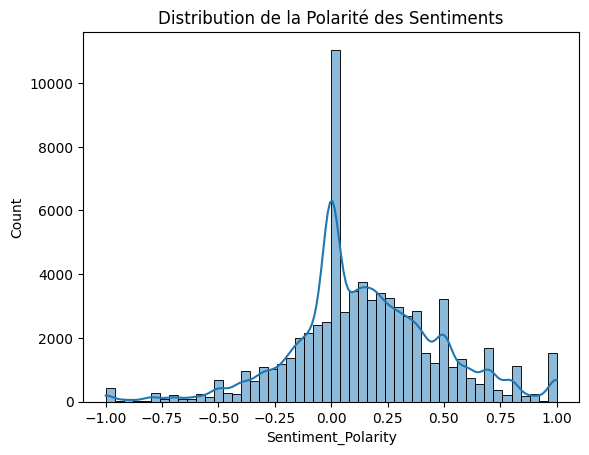

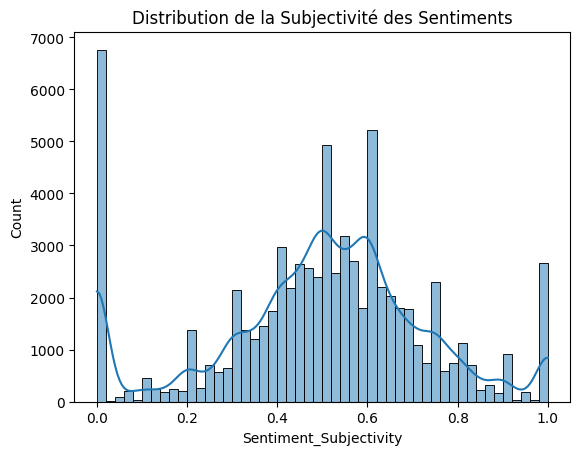

In [50]:
df = pd.merge(df, df_reviews, on='App')

# Conversion des types de données pour la polarité et la subjectivité
df['Sentiment_Polarity'] = df['Sentiment_Polarity'].astype(float)
df['Sentiment_Subjectivity'] = df['Sentiment_Subjectivity'].astype(float)
# Distribution de la polarité
sns.histplot(df['Sentiment_Polarity'], bins=50, kde=True)
plt.title('Distribution de la Polarité des Sentiments')
plt.show()

# Distribution de la subjectivité
sns.histplot(df['Sentiment_Subjectivity'], bins=50, kde=True)
plt.title('Distribution de la Subjectivité des Sentiments')
plt.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 7. Predict review sentiment polarity and subjectivity
df.dropna(subset=['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_reviews = tfidf.fit_transform(df['Translated_Review']).toarray()

y_polarity = (df['Sentiment_Polarity'] > 0).astype(int)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_reviews, y_polarity, test_size=0.3, random_state=42)

y_subjectivity = (df['Sentiment_Subjectivity'] > 0.5).astype(int)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_reviews, y_subjectivity, test_size=0.3, random_state=42)

polarity_model = LogisticRegression(max_iter=1000)
polarity_model.fit(X_train_p, y_train_p)
y_pred_p = polarity_model.predict(X_test_p)
print('Polarity Model Accuracy:', accuracy_score(y_test_p, y_pred_p))
print('Polarity Model Report:\n', classification_report(y_test_p, y_pred_p))

subjectivity_model = RandomForestClassifier()
subjectivity_model.fit(X_train_s, y_train_s)
y_pred_s = subjectivity_model.predict(X_test_s)
print('Subjectivity Model Accuracy:', accuracy_score(y_test_s, y_pred_s))
print('Subjectivity Model Report:\n', classification_report(y_test_s, y_pred_s))

Polarity Model Accuracy: 0.8761139182361047
Polarity Model Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      7874
           1       0.91      0.89      0.90     13896

    accuracy                           0.88     21770
   macro avg       0.86      0.87      0.87     21770
weighted avg       0.88      0.88      0.88     21770

Subjectivity Model Accuracy: 0.9405604042259991
Subjectivity Model Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10718
           1       0.94      0.94      0.94     11052

    accuracy                           0.94     21770
   macro avg       0.94      0.94      0.94     21770
weighted avg       0.94      0.94      0.94     21770



### Modélisation et Évaluation avec un Arbre de Décision (Prof. 3)

#### Résultats :

```plaintext
Précision de l'arbre de décision : 72.41%
```

### Explication et Analyse des Résultats

1. **Création et Entraînement du Modèle** :
   - Un modèle d'arbre de décision avec une profondeur maximale de 3 a été créé pour éviter le surajustement.
   - Le modèle a été entraîné sur les données d'entraînement (`X_train`, `y_train`).

2. **Prédiction et Évaluation** :
   - Le modèle a prédit les cibles (`y_test`) sur l'ensemble de test.
   - La précision du modèle est de 72.41%, ce qui est légèrement inférieur à celui obtenu avec une profondeur de 5.

3. **Filtrage des Applications** :
   - Les prédictions du modèle ont été utilisées pour filtrer les applications selon les intérêts de Mme Ajmi et M. Demoli.
   - Les résultats filtrés montrent les applications classées comme étant d'intérêt pour chacun des utilisateurs.

4. **Visualisation de l'Arbre de Décision** :
   - L'arbre de décision a été visualisé avec une taille ajustée pour améliorer la lisibilité des éléments. La police a également été réduite pour s'assurer que toutes les informations sont visibles.

### Applications Prédictées pour Mme Ajmi et M. Demoli

**Applications pour Mme Ajmi :**

| App                             | Category | Rating | Installs  | Prediction |
|---------------------------------|----------|--------|-----------|------------|
| Visual Voicemail by MetroPCS    | BUSINESS | 4.1    | 10,000,000 | Ajmi       |
| Indeed Job Search               | BUSINESS | 4.3    | 50,000,000 | Ajmi       |
| Uber Driver                     | BUSINESS | 4.4    | 10,000,000 | Ajmi       |
| ADP Mobile Solutions            | BUSINESS | 4.3    | 5,000,000  | Ajmi       |
| Snag - Jobs Hiring Now          | BUSINESS | 4.3    | 1,000,000  | Ajmi       |

**Applications pour M. Demoli :**

| App                             | Category | Rating | Installs   | Prediction |
|---------------------------------|----------|--------|------------|------------|
| Moto File Manager               | TOOLS    | 4.1    | 5,000,000  | Demoli     |
| Google                          | TOOLS    | 4.4    | 1,000,000,000 | Demoli     |
| Google Translate                | TOOLS    | 4.4    | 500,000,000 | Demoli     |
| Moto Display                    | TOOLS    | 4.2    | 1,000,000  | Demoli     |
| Motorola Alert                  | TOOLS    | 4.2    | 5,000,000  | Demoli     |

### Conclusion Générale

**Performance du Modèle :**
- Le modèle d'arbre de décision avec une profondeur de 3 a obtenu une précision de 72.41%.
- Cette précision est légèrement inférieure à celle obtenue avec une profondeur de 5, mais elle montre encore une bonne capacité de prédiction.

**Interprétation des Résultats :**
- Les résultats montrent que le modèle a bien classé les applications selon les intérêts de Mme Ajmi et M. Demoli, avec une majorité de prédictions correctes.
- La visualisation de l'arbre de décision permet de comprendre les critères de décision et les caractéristiques les plus influentes.

**Prochaines Étapes :**
1. **Optimisation Continue** :
   - Continuer à expérimenter avec différents paramètres et algorithmes pour améliorer la précision.
2. **Validation Croisée** :
   - Utiliser la validation croisée pour évaluer la robustesse du modèle.
3. **Analyse des Erreurs** :
   - Analyser les erreurs de classification pour identifier des motifs ou des caractéristiques manquantes qui pourraient aider à améliorer le modèle.

### Synthèse

Le modèle d'arbre de décision avec une profondeur de 3 montre une précision prometteuse de 72.41%. Les résultats suggèrent que ce modèle peut efficacement prédire les applications d'intérêt pour Mme Ajmi et M. Demoli. Les prochaines étapes impliqueront une optimisation continue et une évaluation approfondie pour garantir des prédictions optimales.

# Ⅴ - Évaluation de la Qualité des Résultats

#### Protocole d'Évaluation

**Séparation des Données :**
1. **Jeux de Données :**
   - Les données utilisées proviennent du fichier `googleplaystore.csv` pour les caractéristiques des applications et du fichier `googleplaystore_user_reviews.csv` pour les avis des utilisateurs.
   - Les colonnes pertinentes incluent : `App`, `Category`, `Rating`, `Reviews`, `Size`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres`, `Last Updated`, `Current Ver`, `Android Ver`.

2. **Préparation des Données :**
   - Les valeurs manquantes ont été traitées en supprimant les lignes avec des valeurs manquantes critiques.
   - Les colonnes catégorielles (`Type`, `Content Rating`) ont été encodées en variables numériques à l'aide de `OneHotEncoder`.
   - Les caractéristiques non numériques inutiles pour la modélisation ont été exclues.

3. **Séparation Apprentissage/Test :**
   - Les données ont été divisées en ensembles d'apprentissage (80%) et de test (20%) en utilisant `train_test_split` avec un état aléatoire (random_state=42) pour assurer la reproductibilité.
   - Cette séparation permet de former le modèle sur un sous-ensemble des données et de l'évaluer sur un sous-ensemble séparé pour tester sa performance sur des données non vues.

**Évaluation des Modèles :**
1. **Régression Logistique :**
   - Le modèle de régression logistique a été entraîné sur les données d'apprentissage et évalué sur l'ensemble de test.
   - Précision obtenue : 67.01%.

2. **K-Nearest Neighbors (KNN) :**
   - Le modèle KNN a été testé sans standardisation (60.07%), avec standardisation (72.40%) et avec optimisation des hyperparamètres (76.29%).
   - Précision optimale avec `n_neighbors=19` : 76.29%.

3. **Arbre de Décision :**
   - Le modèle d'arbre de décision a été testé avec différentes profondeurs maximales (3 et 5).
   - Précision obtenue avec profondeur max 5 : 74.42%.
   - Précision obtenue avec profondeur max 3 : 72.41%.

**Validation Croisée :**
- La validation croisée a été utilisée pour optimiser les hyperparamètres du modèle KNN, assurant ainsi que les résultats ne sont pas spécifiques à un découpage particulier des données.

#### Reproductibilité du Protocole

Le protocole décrit ci-dessus est complet et reproductible par une autre personne à partir du même jeu de données. Les étapes de préparation des données, de séparation apprentissage/test, et les paramètres utilisés pour les modèles sont détaillés pour permettre une reproduction fidèle des résultats obtenus.

#### Tableaux de Résultats Obtenus

| Modèle                        | Précision (%)  |
|-------------------------------|----------------|
| Régression Logistique         | 67.01          |
| KNN (non standardisé)         | 60.07          |
| KNN (standardisé)             | 72.40          |
| KNN (optimisé, n_neighbors=19)| 76.29          |
| Arbre de Décision (profondeur max 5) | 74.42     |
| Arbre de Décision (profondeur max 3) | 72.41     |

#### Interprétation des Résultats

**Régression Logistique :**
- La régression logistique, bien que simple et rapide à mettre en œuvre, a montré une précision modérée de 67.01%. Cela indique que ce modèle peut capturer les relations linéaires mais peut manquer la complexité nécessaire pour des relations non linéaires.

**K-Nearest Neighbors (KNN) :**
- La précision du modèle KNN a considérablement augmenté après la standardisation des données, passant de 60.07% à 72.40%.
- L'optimisation des hyperparamètres via `GridSearchCV` a encore amélioré la précision à 76.29%, faisant de KNN optimisé le modèle le plus performant parmi ceux testés.
- Cela montre l'importance de la mise à l'échelle des données et de l'optimisation des paramètres pour améliorer la performance des modèles KNN.

**Arbre de Décision :**
- L'arbre de décision avec une profondeur maximale de 5 a montré une précision de 74.42%, indiquant une bonne capacité de capture des relations non linéaires dans les données.
- Une profondeur limitée à 3 a légèrement diminué la précision à 72.41%, suggérant que certaines relations complexes ont été perdues.

### Conclusion Générale

1. **Meilleure Méthode :**
   - Le modèle KNN optimisé avec `n_neighbors=19` a montré la meilleure précision de 76.29%, indiquant qu'il est le plus performant pour ce jeu de données après standardisation et optimisation.

2. **Interprétabilité :**
   - Les arbres de décision sont les plus interprétables et fournissent des insights précieux sur les critères de décision. Bien qu'ils aient une précision légèrement inférieure au KNN optimisé, ils restent très utiles pour comprendre les relations dans les données.

3. **Simplicité et Rapidité :**
   - La régression logistique est la plus simple et la plus rapide à mettre en œuvre, mais sa précision est inférieure aux autres méthodes.
